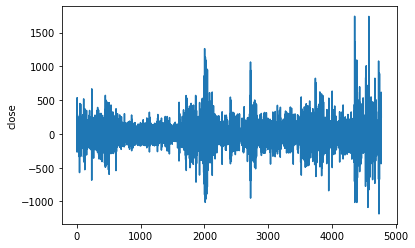

In [2]:
import os
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('C:\\Users\\Mirela\\PycharmProjects\\untitled2\\data_dir\\DJI.csv',
                      usecols=[4]).values.astype('float32')


def delta_time_series(data):
    return data[1:] - data[:-1]

dataset = delta_time_series(dataset)

dataset.shape


def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('close')
    plt.show()

plot_delta(dataset)


In [3]:
# Helper function to get y as a numpy array from the TimeseriesGenerator
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets

train, val, test = dataset[0:3000, :], dataset[3001:4000, :], dataset[4001:None, :]

lookback = 5
step = 1
batch_size = 128

train_data_gen = TimeseriesGenerator(train, train,
                                     length=lookback, sampling_rate=step, stride=1,shuffle=True,
                                     batch_size=batch_size)

val_data_gen = TimeseriesGenerator(val, val,
                                   length=lookback, sampling_rate=step, stride=1,
                                   batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, sampling_rate=step, stride=1,
                                    batch_size=batch_size)

val_steps = (4000 - 3001 - lookback)
test_steps = (len(dataset) - 4001 - lookback)

Epoch 1/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0453 - val_loss: 0.0360
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0410 - val_loss: 0.0355
Epoch 3/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0406 - val_loss: 0.0563
Epoch 4/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0401 - val_loss: 0.0370
Epoch 5/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0402 - val_loss: 0.0342
Epoch 6/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0398 - val_loss: 0.0319
Epoch 7/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0397 - val_loss: 0.0561
Epoch 8/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0395 - val_loss: 0.0387
Epoch 9/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0397 - val_loss: 0.0342
Epoch 10/10
500/500 [==============================] - 17s 35ms/step - loss: 0.039

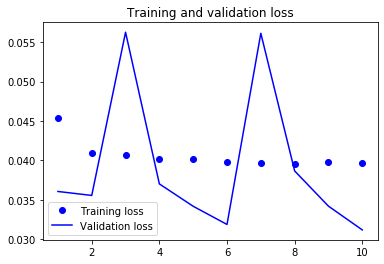

In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0567 - val_loss: 0.0736
Epoch 2/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0409 - val_loss: 0.0421
Epoch 3/10
500/500 [==============================] - 19s 39ms/step - loss: 0.0398 - val_loss: 0.0568
Epoch 4/10
500/500 [==============================] - 20s 41ms/step - loss: 0.0400 - val_loss: 0.0475
Epoch 5/10
500/500 [==============================] - 19s 39ms/step - loss: 0.0394 - val_loss: 0.0445
Epoch 6/10
500/500 [==============================] - 20s 41ms/step - loss: 0.0394 - val_loss: 0.0369
Epoch 7/10
500/500 [==============================] - 20s 39ms/step - loss: 0.0394 - val_loss: 0.0581
Epoch 8/10
500/500 [==============================] - 20s 41ms/step - loss: 0.0395 - val_loss: 0.0369
Epoch 9/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0393 - val_loss: 0.0375
Epoch 10/10
500/500 [==============================] - 19s 38ms/step - loss: 0.039

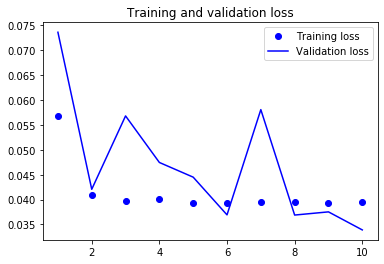

In [6]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0527 - val_loss: 0.0388
Epoch 2/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0401 - val_loss: 0.0321
Epoch 3/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0399 - val_loss: 0.0560
Epoch 4/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0395 - val_loss: 0.0398
Epoch 5/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0394 - val_loss: 0.0347TA: 0s - loss:  - ETA: 0s - lo
Epoch 6/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0394 - val_loss: 0.0310
Epoch 7/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0396 - val_loss: 0.0575
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0391 - val_loss: 0.0372
Epoch 9/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0395 - val_loss: 0.0338 - ETA: 0s - loss: 0.039
Epoch 10/10
500/500 [=======

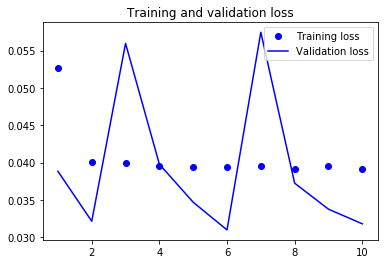

In [7]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0559 - val_loss: 0.0684
Epoch 2/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 3/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0397 - val_loss: 0.0589
Epoch 4/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0396 - val_loss: 0.0416
Epoch 5/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0395 - val_loss: 0.0358
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0395 - val_loss: 0.0369
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0394 - val_loss: 0.0579
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0396 - val_loss: 0.0371
Epoch 9/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0394 - val_loss: 0.0381
Epoch 10/10
500/500 [==============================] - 18s 37ms/step - loss: 0.039

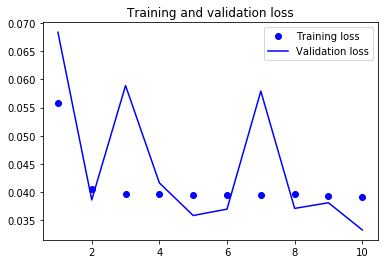

In [8]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
test_loss = model.evaluate_generator(test_data_gen,steps=test_steps)
print('test loss:', test_loss)


test loss: 0.03073030337691307


In [10]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(772, 1)

In [11]:
testPredict = scaler.inverse_transform(testPredict)

In [12]:
testY = get_y_from_generator(test_data_gen)

(772, 1)


In [13]:
testY = scaler.inverse_transform(testY)

In [14]:
from sklearn.metrics import mean_squared_error
import math
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 203.46 RMSE


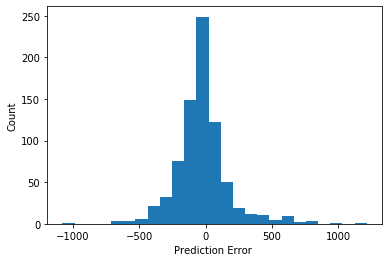

In [15]:
# error distribution
error = testPredict - testY
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error ")
_ = plt.ylabel("Count")
